# Nombre: Alex Reinoso
# Materia: Simulacion
# Fecha 02/06/2022

## Instalar simpy

In [1]:
pip install simpy

## Práctica Propuesta- SimPy SED

Modifique el código anterior a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 15- 20 minutos
    * Automóvil: 7-10 minutos
    * Furgoneta: 12-15 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Identificar el recurso maquina dentro de la simulación
* Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado

#  Solucion

Lavanderia SED
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Removido  {39%} suciedad vehiculo => ['Automovil', '1'] 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {42%} suciedad vehiculo => ['Furgoneta', '1'] 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
Removido  {84%} suciedad vehiculo => ['Automovil', '2'] 
Vehiculo [Automovil-2] lavado a las 22.00.
Se traslada vehiculo: Furgoneta-2 a la hora 22.00.
Removido  {43%} suciedad vehiculo => ['Bus', '1'] 
Vehiculo [Bus-1] lavado a las 24.00.
Entra vehiculo a lavarse: Furgoneta-2 a la hora 

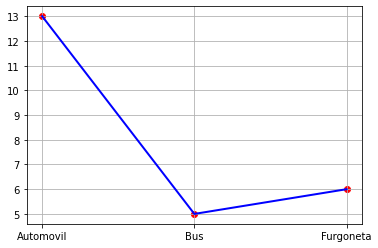

In [9]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline


# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 60
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 200

tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        self.env=environment
        self.maquinas = simpy.Resource(environment, num_maquinas)
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        vehiculo=vehiculo.split('-')
        if(vehiculo[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(vehiculo[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(vehiculo[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        k=vehiculo[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(35,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        vehiculo=vehiculo.split('-')
        if(vehiculo[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(vehiculo[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(vehiculo[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    #print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    with lavanderia.maquinas.request() as maquina:
        yield maquina
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia SED')

env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
env.run(until = TIEMPO_SIMULACION)

datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='blue')
pp.scatter(x,y,color='red')
pp.grid(True)
pp.show()